## Mortgage Loans: Linear Regression Example

### Table of Contents

* [Read Data](#read_data)
* [EDA, Feature Engineering](#eda_feature)
* [Target](#target)
* [Feature Sets](#feature_sets)
    * [Standardize](#standardize)
    * [Correlation Matrix](#correlation)
* [Model - Linear Regreassion](#model_lr)
* [Evaluation](#evaluate)

### Read Data <a class="anchor" id="read_data"></a>

In [42]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import sqrt
import scipy.stats as stats
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
scale= StandardScaler()

In [43]:
df = pd.read_csv('../data/ames_housing.csv')
df.shape

(1460, 81)

### EDA, Feature Engineering <a class="anchor" id="eda_feature"></a>

In [44]:
# get count of null values by column and only display coulmns that have non-zero count of null values
df[df.columns[df.isnull().any()].tolist()].isnull().sum().sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [45]:
# remove commercial zoning
#print(len(df.columns))
print(df.shape)
df=df[df['MSZoning'] != 'C (all)']    #drop 10 rows
print(df.shape)
df['MSZoning'].value_counts().head(10)

(1460, 81)
(1450, 81)


RL    1151
RM     218
FV      65
RH      16
Name: MSZoning, dtype: int64

In [46]:
# # label zones
# # FV - Floating Village retirement homes
# cond_zone = [df['MSZoning']=='RL',df['MSZoning']=='RM',df['MSZoning']=='FV',df['MSZoning']=='RH']
# val_zone = [4,3,2,1]
# df['MSZoning_num']=np.select(cond_zone, val_zone, default=0)

In [47]:
# # use map instaed of above
# zones = {'RL': 4, 'RM': 3, 'FV': 2, 'RH': 1}
# df['MSZoning_num2'] = df['MSZoning'].map(zones)

In [48]:
df_dummies=pd.get_dummies(df)

In [49]:
df_dummies.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual

In [50]:
# map using dict
# df['MSZoning_num'] = df['MSZoning'].map(dict(zip(['RL','RM','FV','RH'],[4,3,2,1])))

In [51]:
print(df['GarageType'].value_counts().head(10))
df['GarageType'].isnull().sum()

Attchd     870
Detchd     381
BuiltIn     88
Basment     18
CarPort      8
2Types       6
Name: GarageType, dtype: int64


79

In [52]:
# classify garages as attached / detached
df['GarageAttached']=np.where(
    (df['GarageType']=='Attchd') | (df['GarageType'] == 'BuiltIn') | (df['GarageType']=='Basment') | 
    (df['GarageType']=='2Types')
    ,1,0)

In [53]:
df['GarageAttached'].value_counts()

1    982
0    468
Name: GarageAttached, dtype: int64

In [54]:
# # split house style into 1, 1.5, 2, 2.5
# # using np.where conditions
# conds = [df['HouseStyle']=='1Story', (df['HouseStyle']=='1.5Fin') | 
#     (df['HouseStyle']=='1.5Unf') | (df['HouseStyle']=='SLvl') | (df['HouseStyle']=='SFoyer'), (df['HouseStyle']=='2Story'), (df['HouseStyle']=='2.5Fin') | 
#     (df['HouseStyle']=='2.5Unf')]
# vals = [1,1.5,2,2.5]

# df['HouseStory']=np.select(conds, vals, default=0)
# df['HouseStory'].value_counts()

df['HouseStory']=np.where(df['HouseStyle']=='1Story',1,0)

In [55]:
# Create dummy variables for year sold
#df=pd.get_dummies(df, columns = ['YrSold'], prefix='YrSold', prefix_sep='_')

In [56]:
df['CentralAir_num']=np.where(df['CentralAir']=='Y',1,0)

In [57]:
df['SaleCondition'].value_counts()

Normal     1194
Partial     125
Abnorml      96
Family       20
Alloca       11
AdjLand       4
Name: SaleCondition, dtype: int64

In [58]:
# remove abnormal and inter-family sale condition
#print(len(df.columns))
#print(df.shape)
df=df[(df['SaleCondition'] != 'Abnorml')]    #drop 10 rows
#print(df.shape)
df=df[(df['SaleCondition'] != 'Family')] 
#print(df.shape)

In [59]:
df['SaleCondition_num'] = np.where(df['SaleCondition']=='Normal',1,0)

In [60]:
# recoding building type
#print(df['BldgType'].value_counts())
df['SingleFam']=np.where(df['BldgType']=='1Fam',1,0)
#print(df['SingleFam'].value_counts())

In [61]:
# recoding total square feet
df['TotalSF'] = df['TotalBsmtSF']+df['1stFlrSF']+df['2ndFlrSF']
df['TotalSF'].describe()

count     1334.000000
mean      2578.768366
std        821.692898
min        334.000000
25%       2020.500000
50%       2491.500000
75%       3026.250000
max      11752.000000
Name: TotalSF, dtype: float64

In [62]:
# recoding bathrooms
df['Bathrooms']=df['FullBath']+(.5*df['HalfBath'])
df['Bathrooms'].describe()

count    1334.000000
mean        1.778111
std         0.631934
min         0.000000
25%         1.000000
50%         2.000000
75%         2.500000
max         3.500000
Name: Bathrooms, dtype: float64

In [63]:
df_final = df.drop(columns=['GarageType','HouseStyle','CentralAir','SaleCondition','BldgType',
'TotalBsmtSF','1stFlrSF','2ndFlrSF','FullBath','HalfBath'])

In [64]:
df_model =  pd.get_dummies(df_final)

### Target <a class="anchor" id="target"></a>

In [65]:
# target
print(df_model['SalePrice'].describe())

count      1334.000000
mean     184358.968516
std       78771.015650
min       39300.000000
25%      132500.000000
50%      166500.000000
75%      216375.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [66]:
# remove extreme outliers
print(df_model.shape[0])
cutpoint_high = df_model['SalePrice'].mean()+3* df_model['SalePrice'].std()
print(cutpoint_high)
cutpoint_low = df_model['SalePrice'].mean()-3* df_model['SalePrice'].std()
print(cutpoint_low)
df_model=df_model[(df_model['SalePrice']<=cutpoint_high) & (df_model['SalePrice']>=cutpoint_low)].copy()
print(df_model.shape[0])

1334
420672.0154647251
-51954.07843324082
1313


In [67]:
def plot_feature(df, feature_name, xlabel_text, shape):
    (mu, sigma) = stats.norm.fit(df)    
    plt.figure(figsize=shape)
    sns.distplot(df, kde=True, hist=True, fit=stats.norm, color="tomato")
    plt.title(feature_name + ' Distribution vs Normal Distribution', fontsize=14)
    plt.xlabel(xlabel_text,    fontsize=12)
    plt.ylabel("Frequency %",  fontsize=12)
    plt.legend(['Normal Dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='upper center')
    plt.show()

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


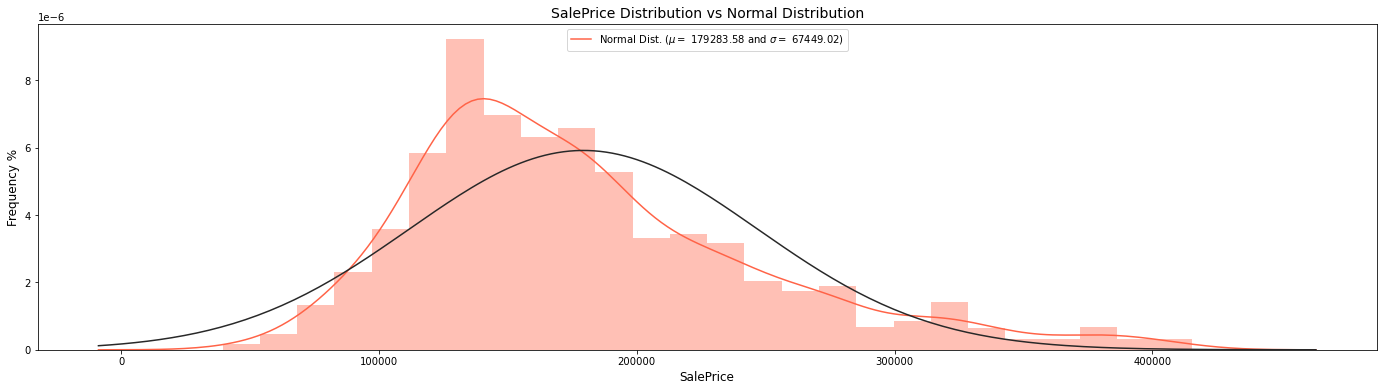

In [68]:
feature_name = 'SalePrice'
plot_feature(df_model[feature_name], feature_name, feature_name, (24,6))

In [69]:
# log Saleprice
df_model["LogSalePrice"] = df_model['SalePrice'].apply(np.log)

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


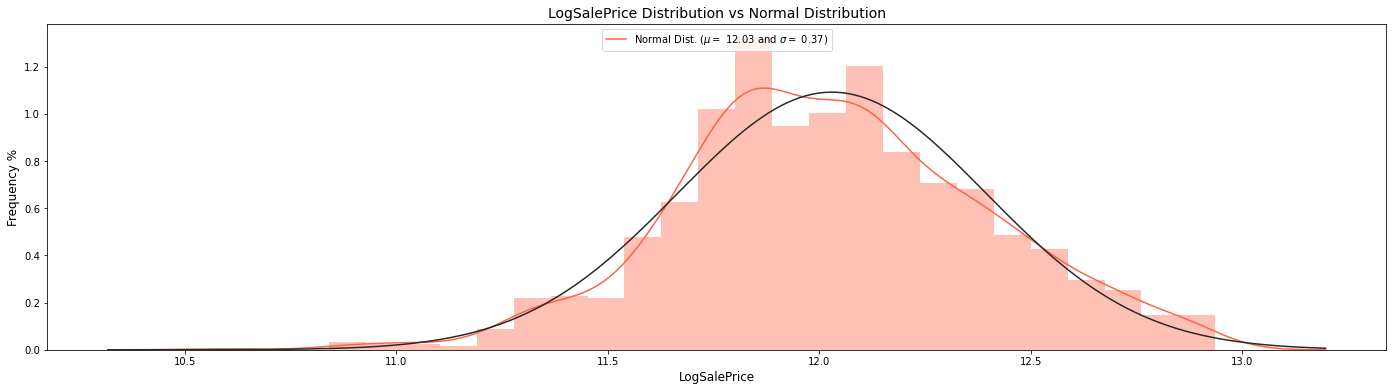

In [70]:
feature_name = 'LogSalePrice'
plot_feature(df_model[feature_name], feature_name, feature_name, (24,6))

#### Correlation Matrix<a class="anchor" id="correlation"></a>

In [71]:
corrs = df_model.corr()

In [ ]:
# corrmat = data[data.dtypes[data.dtypes != 'object'].index].corr()
# f, ax = plt.subplots(figsize=(12, 12))
# sns.heatmap(corrmat, vmax=.8, square=True)

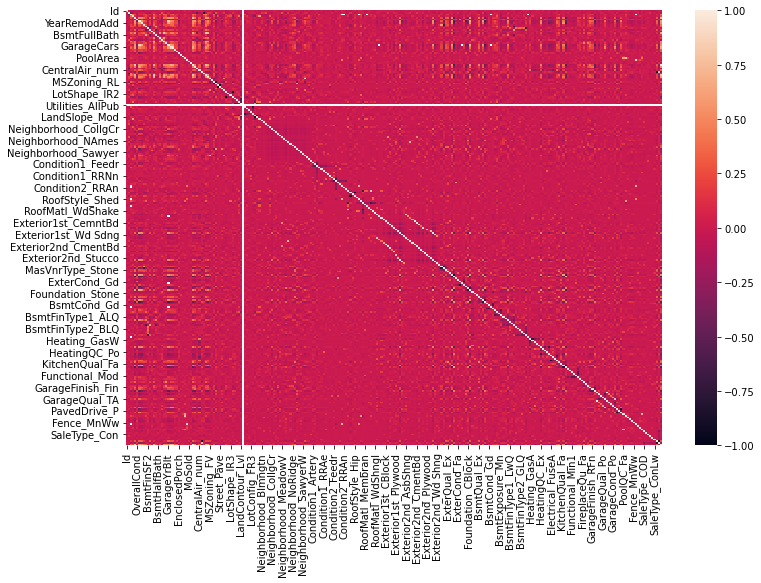

In [75]:
# Display all this as a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corrs);

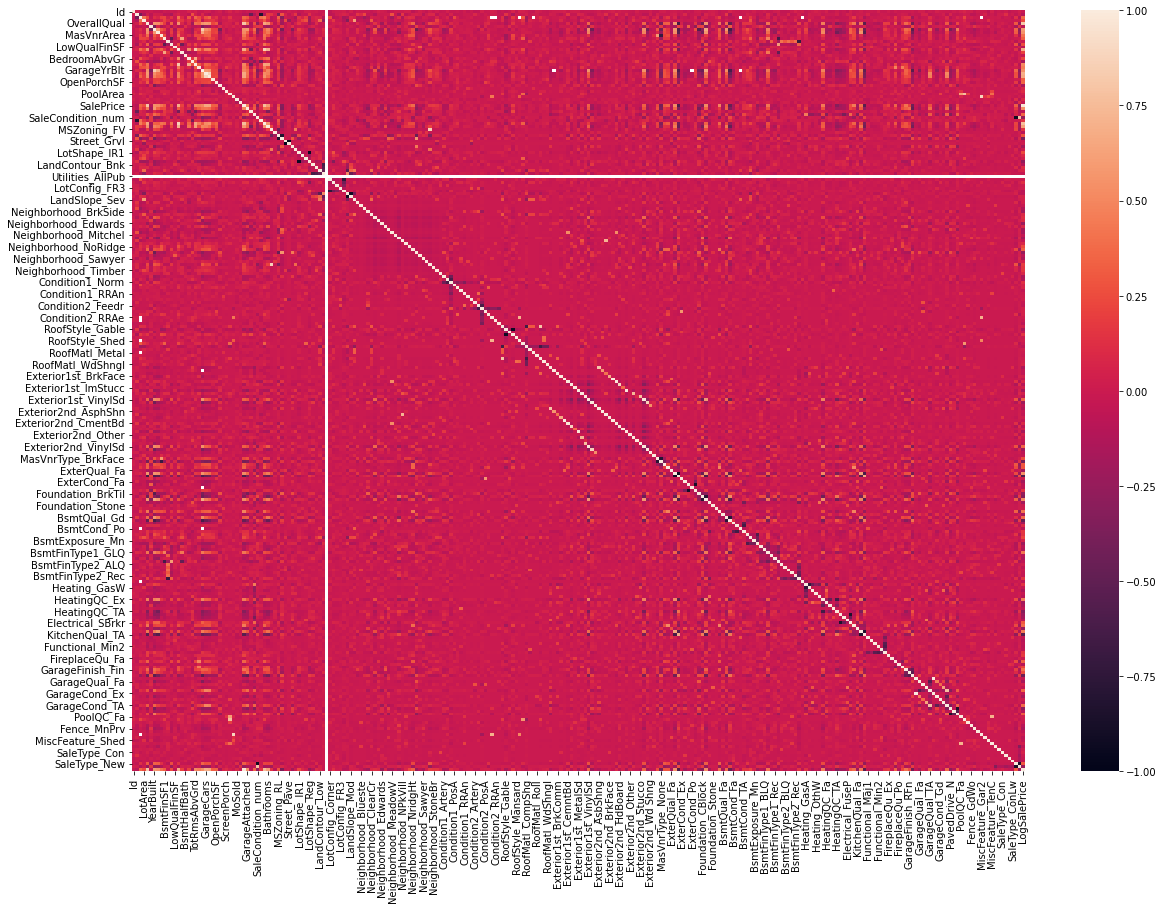

In [74]:
# Display all this as a heatmap
plt.figure(figsize=(20,14))
sns.heatmap(corrs);

### Feature Sets <a class="anchor" id="feature_sets"></a>

In [ ]:
# confirm no missing data
df_X = df[['OverallQual','TotalSF','ExterQual_num','KitchenQual_num','BsmtQual_num','Bathrooms','YearBuilt','YearRemodAdd','GarageAttached',
          'BedroomAbvGr','HouseStory','SingleFam','SingleFam','YrSold','CentralAir_num']]
df_X.isnull().sum()

In [ ]:
# confirm all numerical
df_X.dtypes

### Model - Linear Regreassion <a class="anchor" id="model_lr"></a>

In [ ]:
# declare features and target
y = df['SalePrice']
X = df_X
print(y.shape, X.shape)

In [ ]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=12)

#### Standardize <a class="anchor" id="standardize"></a>

In [ ]:
# standardization of dependent variables - fit and transform training data
#scaled_X_train = scale.fit_transform(X_train) 

In [ ]:
# standardization of dependent variables - fit and transform training data
#Scaled_X_test = scale.transform(X_test)

In [ ]:
# Fit the model to the training dataset
mymodel = LinearRegression()
#mymodel.fit(scaled_X_train, y_train)
mymodel.fit(X_train, y_train)

In [ ]:
# coefficients and intercept
mymodel.intercept_
mymodel.coef_

In [ ]:
# what is the equation for this model?
cols=list(X.columns)
coefs=list(mymodel.coef_)
xcoefs = [(coefs[i], cols[i]) for i in range(0, len(cols))]
equation = f'y = {round(mymodel.intercept_,4)} + {round(xcoefs[0][0],4)}*{xcoefs[0][1]} + {round(xcoefs[1][0],4)}*{xcoefs[1][1]} + {round(xcoefs[2][0],4)}*{xcoefs[2][1]} + {round(xcoefs[3][0],4)}*{xcoefs[3][1]}+ {round(xcoefs[4][0],4)}*{xcoefs[4][1]}+ {round(xcoefs[5][0],4)}*{xcoefs[5][1]} + {round(xcoefs[6][0],4)}*{xcoefs[6][1]} + {round(xcoefs[7][0],4)}*{xcoefs[7][1]} + {round(xcoefs[8][0],4)}*{xcoefs[8][1]} '
print("Regression Equation: ", equation)  

In [ ]:
# what is the equation for this model?
cols=list(X.columns)
coefs=list(mymodel.coef_)
xcoefs = [(coefs[i], cols[i]) for i in range(0, len(cols))]
equation = f'y = {round(mymodel.intercept_,4)} + {round(xcoefs[0][0],4)}*{xcoefs[0][1]} + {round(xcoefs[1][0],4)}*{xcoefs[1][1]} + {round(xcoefs[2][0],4)}*{xcoefs[2][1]} + {round(xcoefs[3][0],4)}*{xcoefs[3][1]}+ {round(xcoefs[4][0],4)}*{xcoefs[4][1]}+ {round(xcoefs[5][0],4)}*{xcoefs[5][1]} + {round(xcoefs[6][0],4)}*{xcoefs[6][1]} + {round(xcoefs[7][0],4)}*{xcoefs[7][1]} + {round(xcoefs[8][0],4)}*{xcoefs[8][1]} + {round(xcoefs[9][0],4)}*{xcoefs[9][1]} + {round(xcoefs[10][0],4)}*{xcoefs[10][1]} + {round(xcoefs[11][0],4)}*{xcoefs[11][1]} + {round(xcoefs[12][0],4)}*{xcoefs[12][1]} {round(xcoefs[13][0],4)}*{xcoefs[13][1]} +{round(xcoefs[14][0],4)}*{xcoefs[14][1]}'
print("Regression Equation: ", equation)  

In [ ]:
# Predict the y-values on the testing dataset & examine the first few
y_preds = [int(x) for x in mymodel.predict(X_test)]
print(list(y_test[:5]))
print(y_preds[:5])

## Model Evaluation

In [ ]:
# compare predictions to known values
plt.figure(figsize=(6,6))
ax = sns.regplot(x = y_preds, 
                 y = y_test, 
                 scatter_kws={"color": "black"}, 
                 line_kws={"color": "red"})
ax.set(xlabel='predicted values', ylabel='true values');

In [ ]:
# R-2 (coefficient of determination)
r2 = metrics.r2_score(y_test, y_preds)
round(r2, 2)

In [ ]:
mymodel.score(X_test, y_test)

In [ ]:
# root mean sq error
rmse = sqrt(metrics.mean_squared_error(y_test, y_preds))
rmse

In [ ]:
# is that more or less than if we just used the average as our model?
avg_val = y_train.mean()
comparison = np.full((len(y_test), ), avg_val)
baseline=sqrt(metrics.mean_squared_error(y_test, comparison))
print(round(baseline,2))
print(round(rmse,2))
print('improvement:',round(rmse-baseline,2))

## Make new predictions

In [ ]:
# remember the linear regression equation?
print(equation)

In [ ]:
# make some fake data
fake1= [[2010, 2, 3, 2000, 1,0]] # modest SF home
fake2= [[2015, 3, 5, 4000, 1,1]] # large SF home in big neighborhood
fake3= [[1980, 1, 2, 1000, 0,0]] # small home, not SF, outside big neighborhood

In [ ]:
# make predictions just using our equation:
for data in [fake1, fake2, fake3]:
    YearBuilt=data[0][0]
    Bathrooms=data[0][1]
    BedroomAbvGr=data[0][2]
    TotalSF=data[0][3]
    SingleFam=data[0][4]
    LargeNeighborhood=data[0][5]
    y = -1360501.3809 + 704.4287*YearBuilt + 12738.4775*Bathrooms + -7783.1712*BedroomAbvGr + 49.824*TotalSF+ 25282.091*SingleFam+ -6637.2636*LargeNeighborhood 
    print('$',int(y))

In [ ]:
# pickle your model
import pickle
filename = open('ames_housing_lr_model.pkl', 'wb')
pickle.dump(mymodel, filename)
filename.close()

In [ ]:
## read in our pickle file
filename = open('ames_housing_lr_model.pkl', 'rb')
unpickled_model = pickle.load(filename)
filename.close()

In [ ]:
# make predictions
for data in [fake1, fake2, fake3]:
    print('$',int(unpickled_model.predict(data)))

## Turn that into a function

In [ ]:
def ames_lr_function(YearBuilt,Bathrooms,BedroomAbvGr,TotalSF,SingleFam,LargeNeighborhood):
    checksum=0
    for var in [YearBuilt,Bathrooms,BedroomAbvGr,TotalSF,SingleFam,LargeNeighborhood]:
        if isinstance(var,int)==False:
            checksum+=1
    if (YearBuilt<1900)|(YearBuilt>2020):
        checksum+=1
    if (Bathrooms<1) | (Bathrooms>5):
        checksum+=1
    if (BedroomAbvGr<1) | (BedroomAbvGr>5):
        checksum+=1
    if (TotalSF<100)|(TotalSF>5000):
        checksum+=1
    if (SingleFam!=0) & (SingleFam!=1):
        checksum+=1
    if (LargeNeighborhood!=0) & (LargeNeighborhood!=1):
        checksum+=1
    if checksum>0:
        return "Please provide adequate inputs"
    else:
        y = [-1360501.3809 + 704.4287*YearBuilt + 12738.4775*Bathrooms + -7783.1712*BedroomAbvGr + 49.824*TotalSF+ 25282.091*SingleFam+ -6637.2636*LargeNeighborhood]
#         y = unpickled_model.predict([[YearBuilt,Bathrooms,BedroomAbvGr,TotalSF,SingleFam,LargeNeighborhood]])
        formatted_y = "${:,.2f}".format(y[0])
        return formatted_y 

In [ ]:
# test the function
YearBuilt=2015
Bathrooms=3
BedroomAbvGr=3
TotalSF=2000
SingleFam=0
LargeNeighborhood=1
ames_lr_function(YearBuilt,Bathrooms,BedroomAbvGr,TotalSF,SingleFam,LargeNeighborhood)